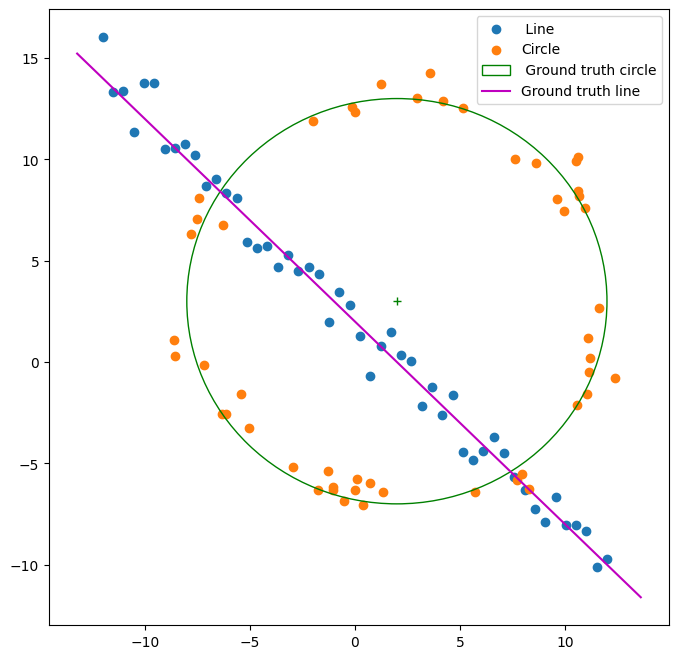

In [11]:
# Generation o f a Noisy Po in t Set Conforming to a Line and a Circle
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
import tikzplotlib

# np . random . seed ( 0 )
N = 100
half_n = N//2
r = 10
x0_gt , y0_gt = 2 , 3 # Center
s = r /16

t = np.random.uniform (0 ,2*np.pi,half_n)

n = s*np.random.randn( half_n )

x,y = x0_gt + (r + n)*np.cos(t) , y0_gt + (r + n)*np.sin(t)

X_circ = np.hstack((x.reshape(half_n , 1) ,y.reshape(half_n , 1)))

s = 1.
m, b = -1, 2
x = np.linspace (-12, 12 , half_n )
y = m*x + b + s*np.random.randn( half_n )

X_line = np.hstack((x.reshape( half_n , 1 ) , y.reshape( half_n , 1 )))
X = np.vstack ( ( X_circ , X_line ) ) # All points


# Plotting
fig , ax = plt . subplots (1 ,1 , figsize =(8 ,8))
ax . scatter ( X_line [ : , 0 ] , X_line [ : , 1 ] , label= ' Line'  )
ax . scatter ( X_circ [ : , 0 ] , X_circ [ : , 1 ] , label= 'Circle' )
circle_gt = plt.Circle(( x0_gt , y0_gt ) , r , color= 'g' , fill =False , label= ' Ground truth circle')
ax . add_patch ( circle_gt )
ax.plot((x0_gt) , (y0_gt) , '+' , color= 'g' )
x_min , x_max = ax.get_xlim ()
x_ = np.array([x_min,x_max])
y_ = m*x_ + b
plt . plot ( x_ , y_ , color= 'm' , label= 'Ground truth line')
plt . legend ()

--------------------------------------implementing RANSAC Line---------------------------------

iteration 37
line_best_error 11.997463602107414
best_line_indices [86 51]
best_line_model [0.71149808 0.70268804 1.26928179]
no of inliers 47

iteration 67
line_best_error 11.997463602106784
best_line_indices [77 51]
best_line_model [0.71149808 0.70268804 1.26928179]
no of inliers 47

iteration 69
line_best_error 9.419871758493459
best_line_indices [57  4]
best_line_model [0.69062906 0.72320917 1.76448059]
no of inliers 42

--------------------------------------implementing RANSAC Circle---------------------------------


no of elements in X 100
no of inliers 42
remnants 58

iteration 10
best_error 7.666853600465137
best_indecies [ 7 23  1]
best_model [ 2.36126143  3.13850222 10.04647514]
no of inliers 40

iteration 13
best_error 5.424200108409566
best_indecies [23 18 21]
best_model [ 2.47483824  3.08694555 10.07632875]
no of inliers 36

iteration 45
best_error 4.775342825296622
best_indeci

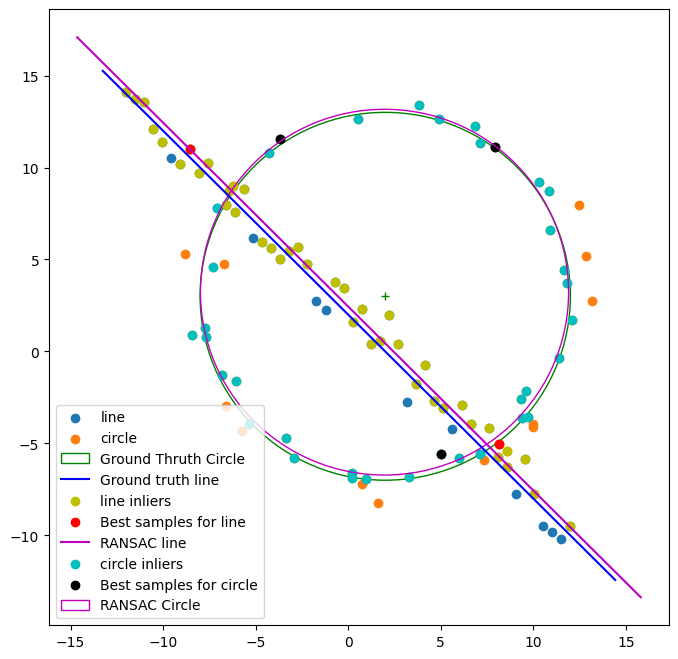

In [14]:
# Generation of a Noisy Point Set Conforming to a Line and a Circl e
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
import tikzplotlib
# np . random . seed ( 0)
N = 100
half_n = N//2
r = 10
x0_gt , y0_gt = 2 , 3 # Center
s = r /16
t = np . random . uniform (0 , 2*np . pi , half_n )
n = s*np . random . randn ( half_n )
x , y = x0_gt + ( r + n)*np . cos ( t ) , y0_gt + ( r + n)*np . sin ( t )
X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
s = 1.
m, b = -1, 2
x = np . linspace(-12, 12 , half_n )
y = m*x + b + s*np . random . randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) ) # All point s
fig , ax = plt.subplots (1 ,1 , figsize=(8 ,8))
ax . scatter( X_line [ : , 0 ] , X_line [ : , 1 ] , label= 'line')
ax.scatter( X_circ [ : , 0 ] , X_circ [ : , 1 ] , label = 'circle')
circle_get = plt.Circle( ( x0_gt , y0_gt ) , r , color = 'g', fill=False , label='Ground Thruth Circle' )
ax . add_patch (circle_get)
ax . plot ( ( x0_gt ) , ( y0_gt ) ,'+', color = 'g' )
x_min , x_max = ax . get_xlim ( )
x_ = np . array ( [ x_min , x_max ] )
y_ = m*x_ + b
plt.plot ( x_ , y_ ,color = 'b' , label= 'Ground truth line' )
plt.legend ( )


#------------------------------------------------------implementing RANSAC Line---------------------------------------------

N = X.shape[0]  # number of points
X = X # data matrix
print('--------------------------------------implementing RANSAC Line---------------------------------')

#total least square erorr for line
def line_total_error(x,line_indices):
    a,b,d = x[0],x[1],x[2]
    return np.sum(np.square(a*X[line_indices,0]+b*X[line_indices,1]-d))

#constraint
def cons(x):
    return x[0]**2+x[1]**2-1

constraint = ({'type':'eq','fun':cons})

#consensus set
def line_consensus_set(X,x,line_threshold):
    a,b,d = x[0],x[1],x[2]
    error = np.abs(a*X[:,0]+b*X[:,1]-d)
    return error<line_threshold

line_max_iterartion = 100
line_threshold = 1.
line_data_points = 0.4*N
line_best_error = np.inf
line_sample = 2

best_line_indices = []
best_line_model = []
line_inlinears = []
best_line_inliers = []   
line_iteration = 0

while line_iteration< line_max_iterartion:
    line_indices = np.random.randint(0,N,line_sample)  #randomly select s points
    x0 = np.array([1,1,0]) #initial guess
    res = minimize(line_total_error,x0=x0,args=(line_indices),tol= 1e-6,constraints=constraint) #minimize the error
    line_inlinears = line_consensus_set(X,res.x,line_threshold)  #find the consensus set
    if np.sum(line_inlinears) > line_data_points:
        x0 = res.x
        res = minimize(line_total_error, x0=x0, args=(line_inlinears),tol= 1e-6, constraints=constraint) #refit the model
        if res.fun < line_best_error:
            print('\niteration',line_iteration)
            line_best_error = res.fun
            best_line_indices = line_indices
            best_line_model = res.x
            best_line_inliers = line_inlinears
            print('line_best_error',line_best_error)
            print('best_line_indices',best_line_indices)
            print('best_line_model',best_line_model)
            print('no of inliers',np.sum(best_line_inliers))

    line_iteration+= 1

ax.scatter(X[best_line_inliers,0],X[best_line_inliers,1],color='y',label='line inliers')
ax.scatter(X[best_line_indices,0],X[best_line_indices,1],color='r',label='Best samples for line')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = (-best_line_model[1]*x_ + best_line_model[2])/best_line_model[1]
plt.plot(x_, y_, color ='m', label='RANSAC line')
ax.legend()


#--------------------------------------implementing RANSAC Circle---------------------------------

print('\n--------------------------------------implementing RANSAC Circle---------------------------------')
print('\n')
print('no of elements in X',len(X))
print('no of inliers',np.sum(best_line_inliers))

line_outliers = np.where(best_line_inliers==False)[0]
remnants = np.array([X[line_outliers[i]] for i in range(len(line_outliers))])
print('remnants',len(remnants))

def circle_tls(x, indices):
    x0, y0, r = x
    x1, y1 = remnants[indices].T
    return np.sum((np.sqrt((x1 - x0)**2 + (y1 - y0)**2) - r)**2)

def circle_consenus_set(remnants, x, circle_threshold):
    distances = np.abs(np.linalg.norm(remnants - x[:2], axis=1) - x[2])
    # Count number of inliers
    return distances < circle_threshold

circle_threshold = 1.
max_circle_iterations = 1000
circle_best_model = []
circle_best_inliers = []
circle_best_error = np.inf
circle_best_indecies = []
circle_iteration = 0
circle_sample =3
circle_num_data = 35

while circle_iteration < max_circle_iterations:
    circle_indicies = np.random.randint(0,len(remnants), circle_sample)
    x0 = np.array([0,0,0]) #initial guess
    res = minimize(circle_tls, x0, args=circle_indicies, tol=1e-6) #minimize the error
    circle_inliers = circle_consenus_set(remnants, res.x, circle_threshold)  #find the consensus set


    if np.sum(circle_inliers) > circle_num_data:
            x0 = res.x
            res = minimize(circle_tls, x0=x0, args=(circle_inliers),tol= 1e-6)
            if res.fun < circle_best_error:
                print('\niteration',circle_iteration)
                circle_best_error = res.fun
                circle_best_indecies = circle_indicies
                circle_best_model = res.x
                circle_best_inliers = circle_inliers
                print('best_error',circle_best_error)
                print('best_indecies',circle_best_indecies)
                print('best_model',circle_best_model)
                print('no of inliers',np.sum(circle_best_inliers))
                # best_model = res.x
                # best_inliers = inliers
                # best_indecies = indices
    circle_iteration += 1


ax.scatter(remnants[circle_best_inliers,0],remnants[circle_best_inliers,1],color='c',label='circle inliers')
ax.scatter(remnants[circle_best_indecies,0],remnants[circle_best_indecies,1],color='k',label='Best samples for circle')
circle = plt.Circle((circle_best_model[0],circle_best_model[1]),circle_best_model[2],color='m',fill=False,label='RANSAC Circle')
ax.add_patch(circle)
ax.legend()